<a href="https://colab.research.google.com/github/shivanshu07/Number-Plate-Recognition-using-DL-and-OCR/blob/main/easyOCR_cv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage2: Number Plate recognition using **EsayOCR**

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebook/archive (3).zip"

Install Requirements

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow
import xml.etree.ElementTree as ET
import os
import csv

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

# Detection using Canny Edge Detector

Grayscale and Smooth Image

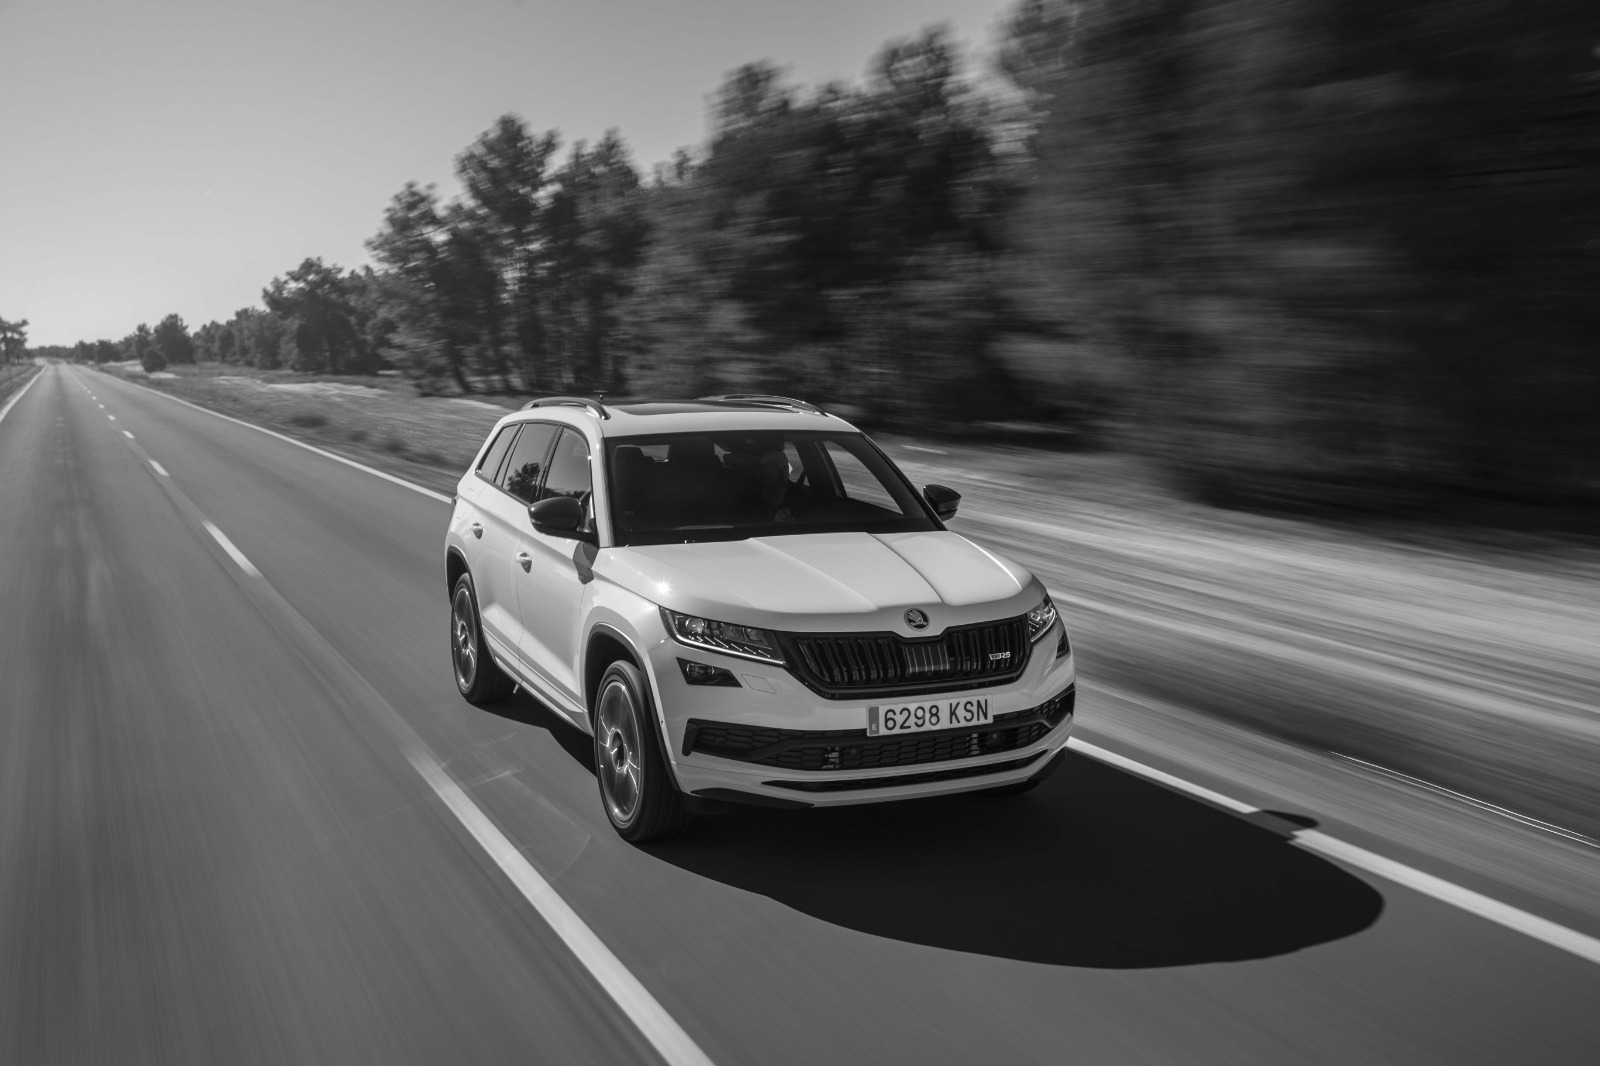

In [ ]:
img = cv2.imread('/content/images/WhatsApp Image 2023-05-08 at 21.35.33.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction



---



Trying Edge Detection Using Multiple Techniques

1. Detect Edges in Image (Using Canny Edge Detector)

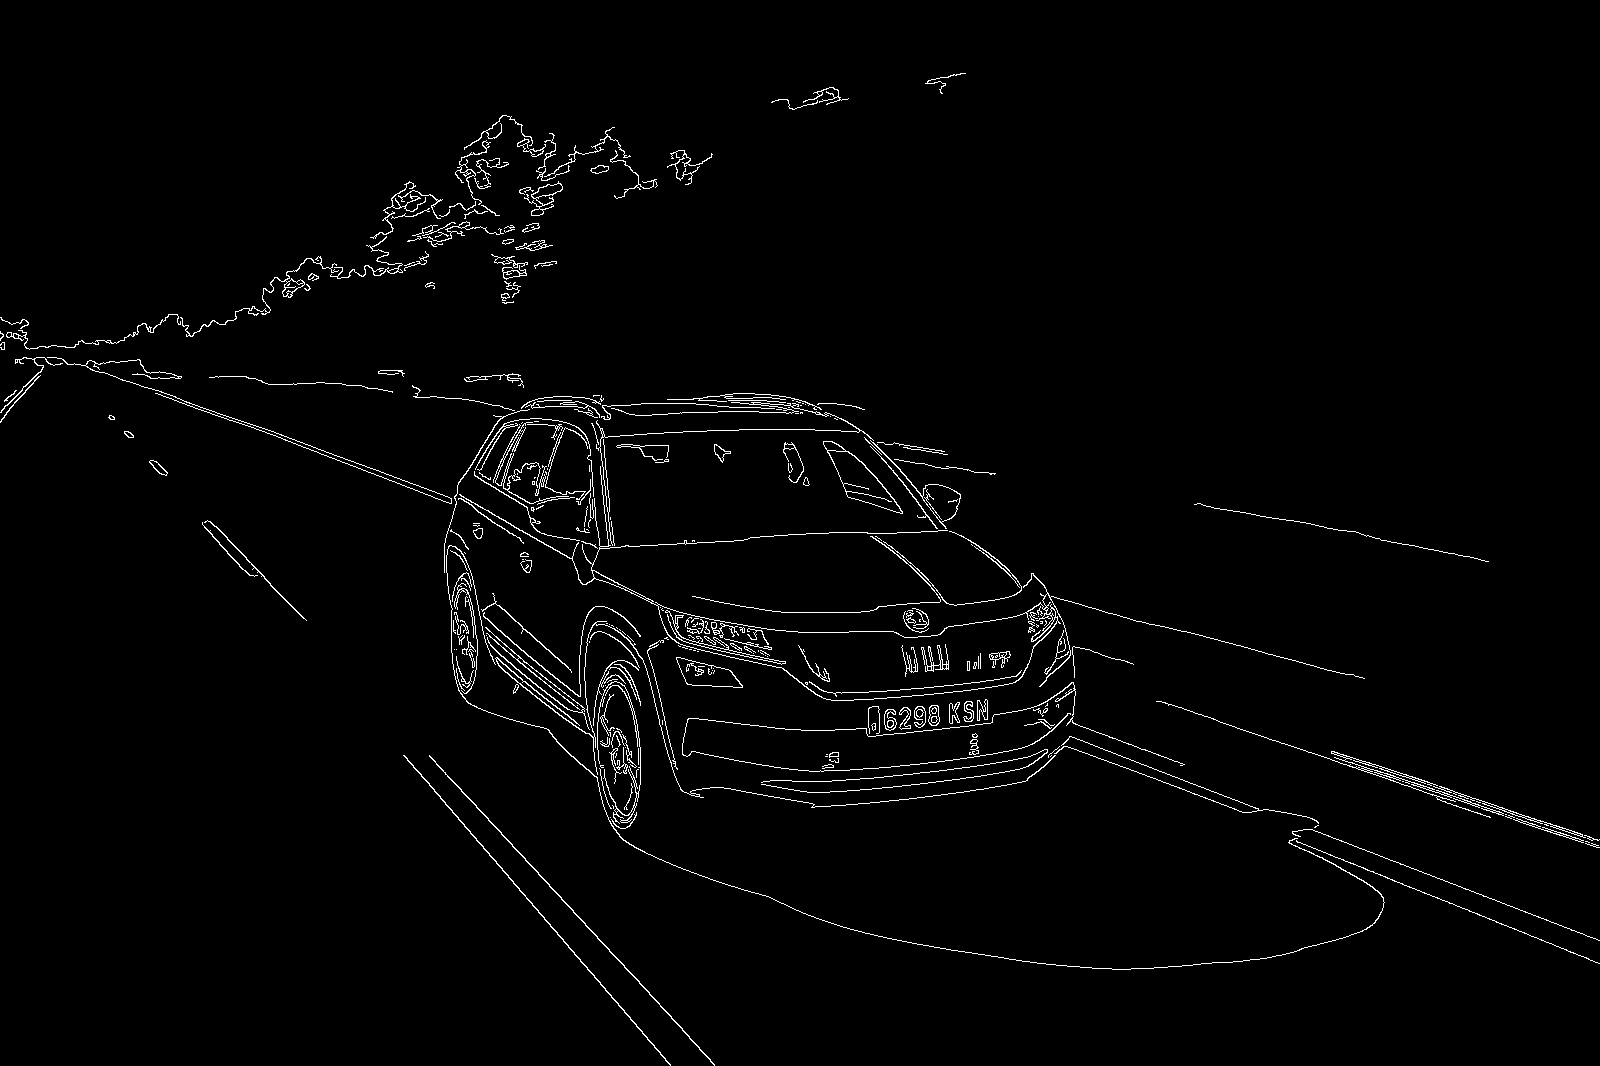

In [ ]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
cv2_imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))



---



Find Position of Number Plate

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[823, 441]],

       [[848, 497]],

       [[902, 513]],

       [[861, 461]]], dtype=int32)

Mask and Colorize the number plate

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [ ]:
cv2_imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

In [ ]:
cv2_imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Text Recognition using EasyOCR

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

In [ ]:
result

Putting Text in image, then display

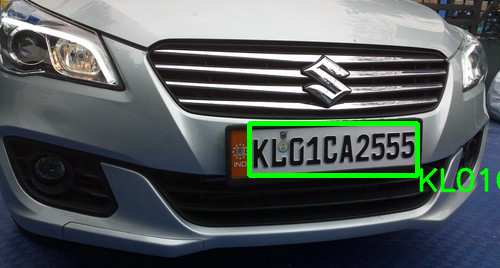

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
cv2_imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
text

'KL01CA2555'

# Recognition using EasyOCR for Web-Cam detected images

In [ ]:
predicted = []

MH20 @V2363


GSH0836


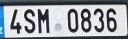

RJilcP


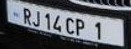

Ky68 Wzo]


IND


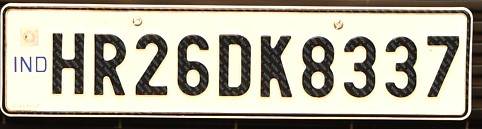

Kz69


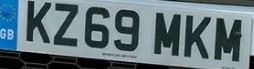

BSJ} 0924


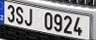

IT20 BOM


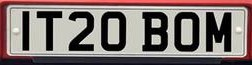

KSN


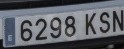

KL


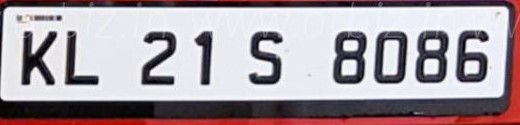

Kyig VIH


0.


6298 KSN


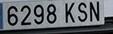

KYZI XPX


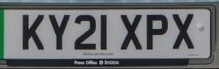

3


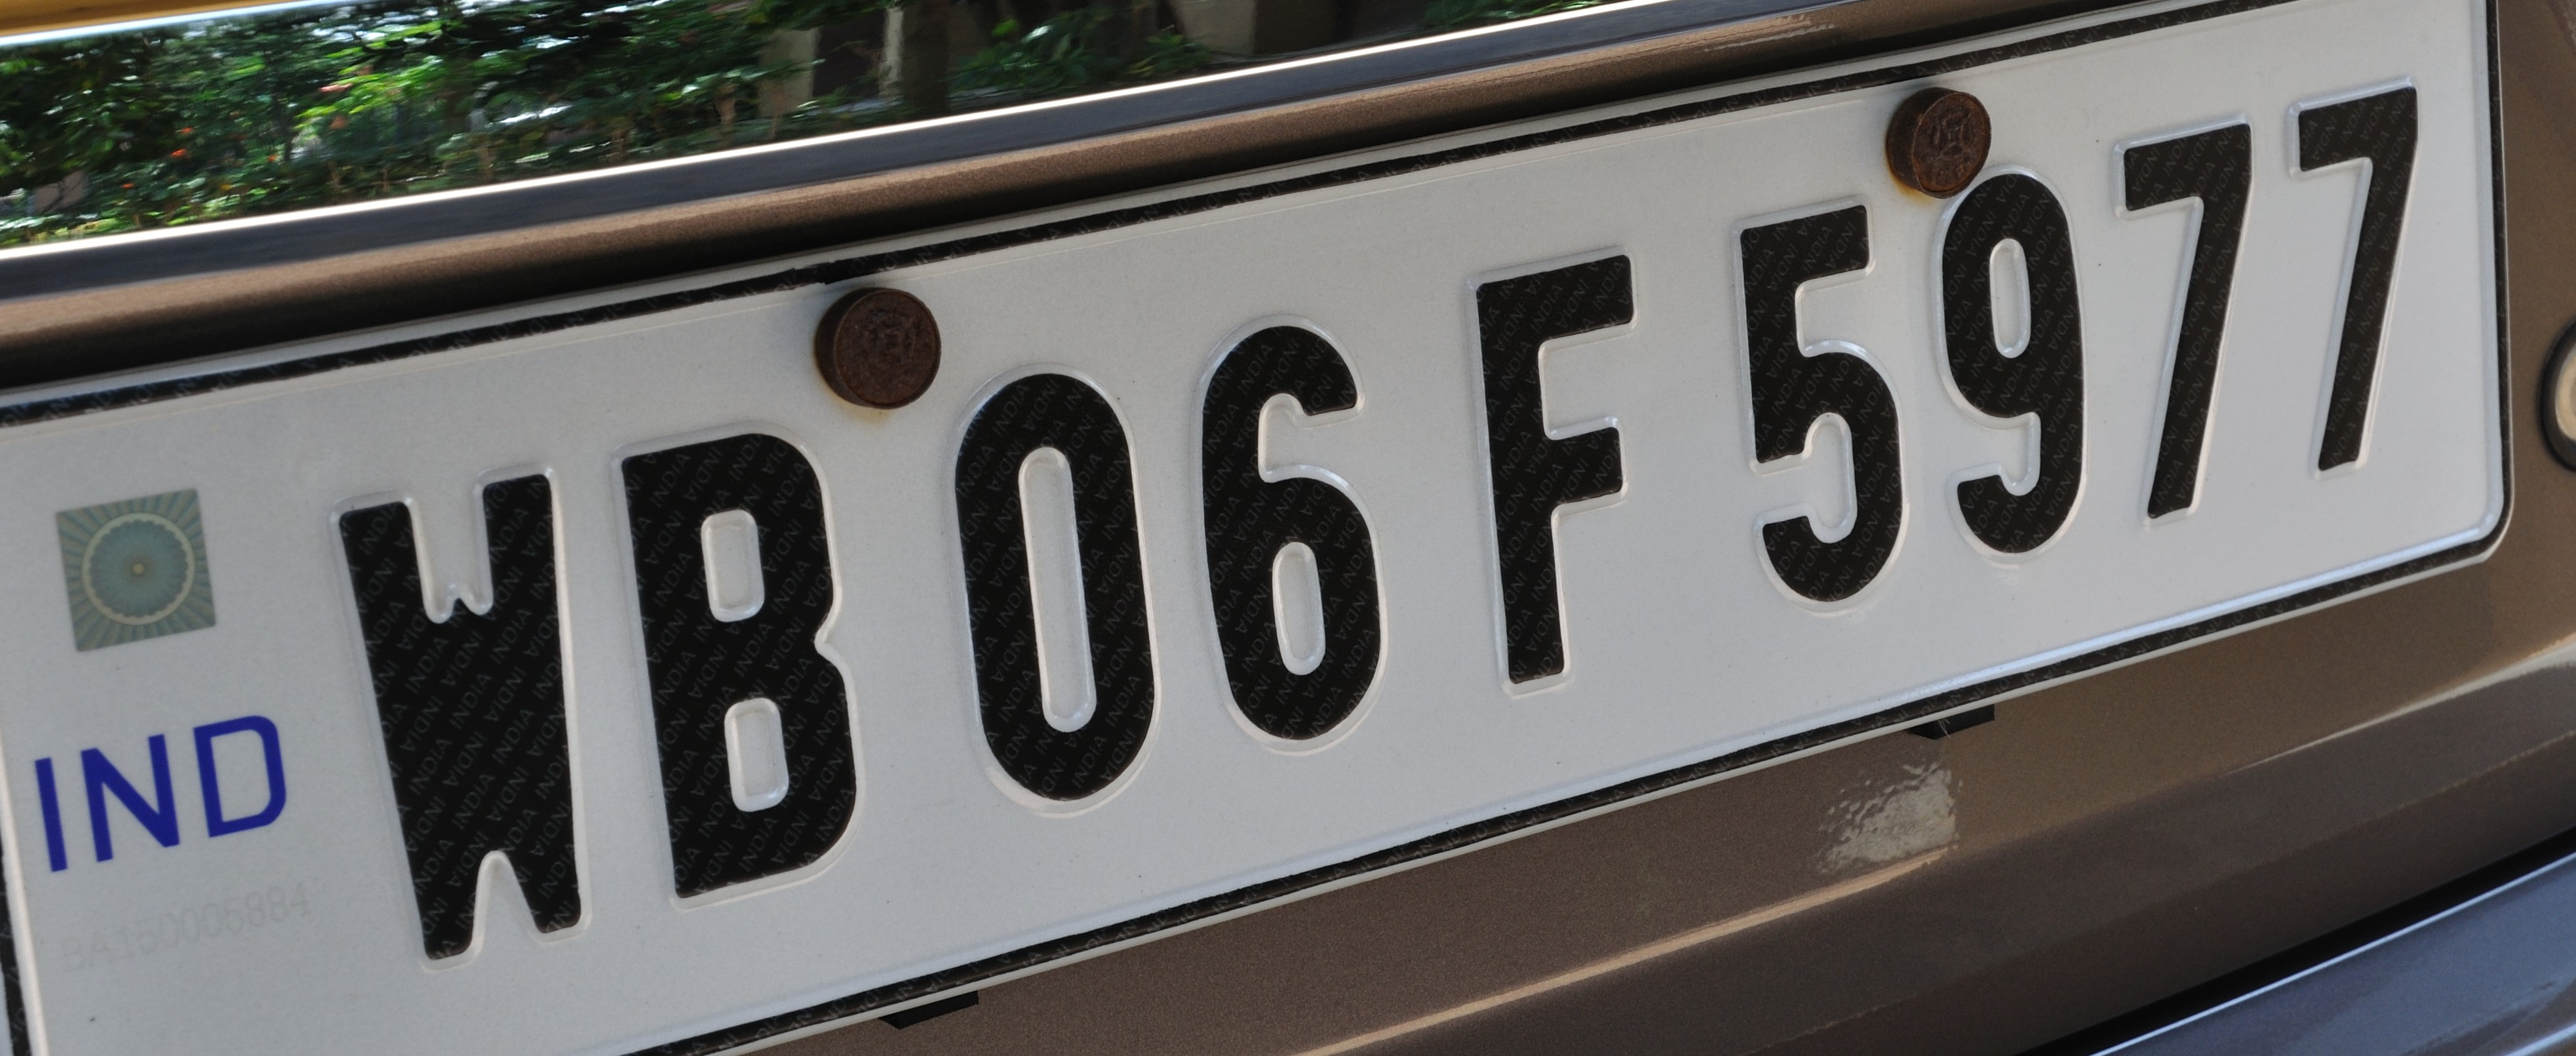

TGL7ooLe


[HR26 BR 9044


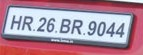

PO 4KCZO


KL 07 CP 7235


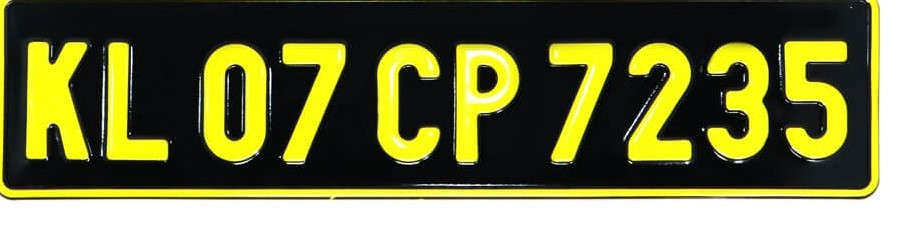

NL22 OCE[


MH20 OV2363


GR:


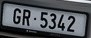

IKY20 HPE


In [ ]:
folder_path = "/content/images1"

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        result = reader.readtext(gray)
        predicted.append(result[0][-2])
        print(result[0][-2])
        cv2_imshow(image)

KL 07 CP 7235


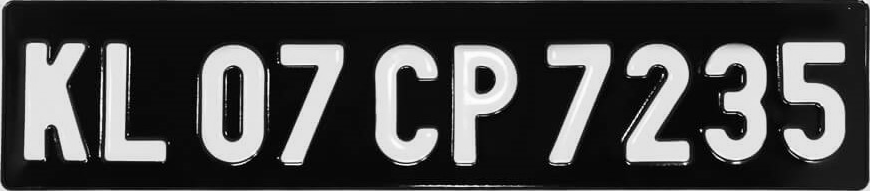

DZIZ YXR


4SM 0836


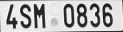

UTz0 BOM


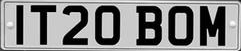

KL


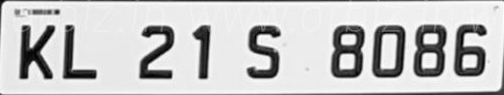

381 0924


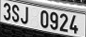

KL01CA2555


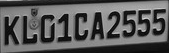

INDI


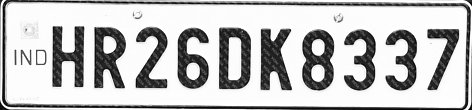

RJilcp


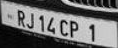

PGoMN112


0H20 0v2363


In [ ]:
folder_path = "/content/images2"

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        result = reader.readtext(gray)
        predicted.append(result[0][-2])
        print(result[0][-2])
        cv2_imshow(image)

In [ ]:
len(predicted)

34

In [ ]:
for i in range(len(predicted)):
  predicted[i] = predicted[i].replace(" ", "")

In [ ]:
for i in range(len(predicted)):
  predicted[i] = predicted[i].upper()

In [ ]:
predicted

['MH20@V2363',
 'GSH0836',
 'RJILCP',
 'KY68WZO]',
 'IND',
 'KZ69',
 'BSJ}0924',
 'IT20BOM',
 'KSN',
 'KL',
 'KYIGVIH',
 '0.',
 '6298KSN',
 'KYZIXPX',
 '3',
 'TGL7OOLE',
 '[HR26BR9044',
 'PO4KCZO',
 'KL07CP7235',
 'NL22OCE[',
 'MH20OV2363',
 'GR:',
 'IKY20HPE',
 'KL07CP7235',
 'DZIZYXR',
 '4SM0836',
 'UTZ0BOM',
 'KL',
 '3810924',
 'KL01CA2555',
 'INDI',
 'RJILCP',
 'PGOMN112',
 '0H200V2363']

Evaluation

In [ ]:
with open('/content/truetext.txt', 'r') as file:
  reader = csv.reader(file, delimiter=',')
  num_list = [row for row in reader]

In [ ]:
num_list = np.array(num_list)

In [ ]:
true_num = num_list[:, 0].tolist()

In [ ]:
true_num

['MH20DV2363',
 '4SM0836',
 'RJ14CP1',
 'KY68WZO',
 'HR26DK8337',
 'KZ69MKM',
 '3SJ0924',
 'IT20BOM',
 '6298KSN',
 'KL21S8086',
 'KYI9VTM',
 '202D9387',
 '6298KSN',
 'KY2IXPX',
 'WB06F5977',
 'GL70OLE',
 'HR26BR9044',
 'PO4KC70',
 'KL07CP7235',
 'ML22OCF',
 'MH200V2363',
 'GR5342',
 'KY20MPE',
 'KL07CP7235',
 'DZI7YXR',
 '4SM0836',
 'IT20BOM',
 'KL21S8086',
 '3SJ0924',
 'KL01CA2555',
 'HR26DK8337',
 'RJ14CP1',
 'PGMN112',
 'MH20DV2363']

In [ ]:
len(true_num)

34

Accuracy Test

In [ ]:
count = 0

for i in range(len(predicted)):
  if predicted[i] == true_num[i]:
    count += 1

print(count/len(predicted))

0.17647058823529413


In [ ]:
pred = ['MH20@V2363',
 'GSH0836',
 'RJILCP',
 'KY68WZO]',
 'IND',
 'KZ69',
 'BSJ}0924',
 'IT20BOM',
 'KSN',
 'KL',
 'KYIGVIH',
 '0.',
 '6298KSN',
 'KYZIXPX',
 '3',
 'TGL7OOLE',
 '[HR26BR9044',
 'PO4KCZO',
 'KL07CP7235',
 'NL22OCE[',
 'MH20OV2363',
 'GR:',
 'IKY20HPE',
 'KL07CP7235',
 'DZIZYXR',
 '4SM0836',
 'UTZ0BOM',
 'KL',
 '3810924',
 'KL01CA2555',
 'INDI',
 'RJILCP',
 'PGOMN112',
 '0H200V2363']

In [ ]:
true = ['MH20DV2363',
 '4SM0836',
 'RJ14CP1',
 'KY68WZO',
 'HR26DK8337',
 'KZ69MKM',
 '3SJ0924',
 'IT20BOM',
 '6298KSN',
 'KL21S8086',
 'KYI9VTM',
 '202D9387',
 '6298KSN',
 'KY2IXPX',
 'WB06F5977',
 'GL70OLE',
 'HR26BR9044',
 'PO4KC70',
 'KL07CP7235',
 'ML22OCF',
 'MH200V2363',
 'GR5342',
 'KY20MPE',
 'KL07CP7235',
 'DZI7YXR',
 '4SM0836',
 'IT20BOM',
 'KL21S8086',
 '3SJ0924',
 'KL01CA2555',
 'HR26DK8337',
 'RJ14CP1',
 'PGMN112',
 'MH20DV2363']

In [ ]:
let_len = 0
count = 0

for i in range(len(pred)):
  let_len += len(pred[i])
  temp = sum(1 for a, b in zip(pred[i], true[i]) if a != b) + abs(len(pred[i]) - len(true[i]))
  count += temp

print(count/let_len)

0.5688888888888889
